In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


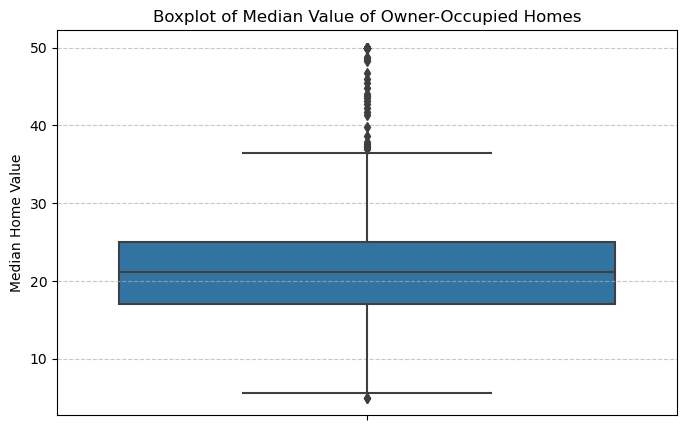

In [3]:


plt.figure(figsize=(8, 5))
sns.boxplot(y=boston_df["MEDV"])

plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("Median Home Value")
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()

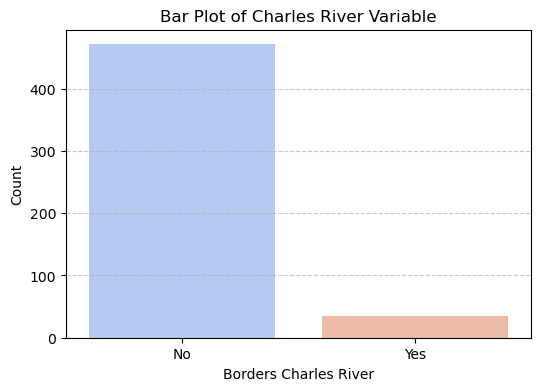

In [5]:


value_counts = boston_df["CHAS"].value_counts()


plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="coolwarm")


plt.xticks([0, 1], ["No", "Yes"]) 
plt.xlabel("Borders Charles River")
plt.ylabel("Count")
plt.title("Bar Plot of Charles River Variable")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

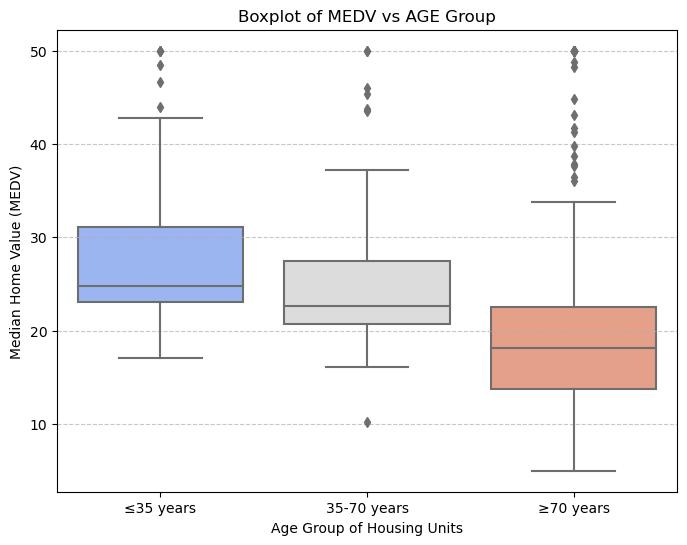

In [10]:



medv_column = "MEDV" 
age_column = "AGE"  

# Categorize AGE into three groups
boston_df["AGE_group"] = pd.cut(boston_df[age_column], 
                         bins=[0, 35, 70, 100], 
                         labels=["≤35 years", "35-70 years", "≥70 years"])

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df["AGE_group"], y=boston_df[medv_column], palette="coolwarm")

# Customize the plot
plt.xlabel("Age Group of Housing Units")
plt.ylabel("Median Home Value (MEDV)")
plt.title("Boxplot of MEDV vs AGE Group")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

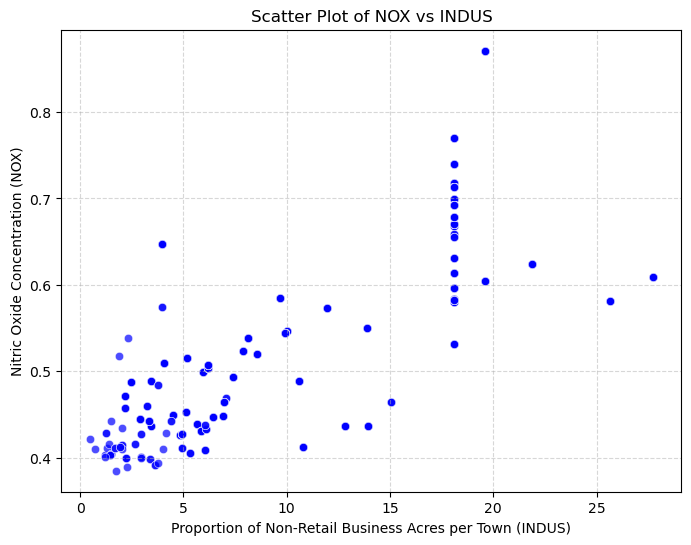

In [11]:

nox_column = "NOX"  
industrial_column = "INDUS"  

plt.figure(figsize=(8, 6))
sns.scatterplot(x=boston_df[industrial_column], y=boston_df[nox_column], alpha=0.7, color="b")


plt.xlabel("Proportion of Non-Retail Business Acres per Town (INDUS)")
plt.ylabel("Nitric Oxide Concentration (NOX)")
plt.title("Scatter Plot of NOX vs INDUS")
plt.grid(True, linestyle="--", alpha=0.5)


plt.show()

# the points show a positive trend, it suggests that higher industrial land use is associated with higher nitric oxides concentration, which aligns with expectations

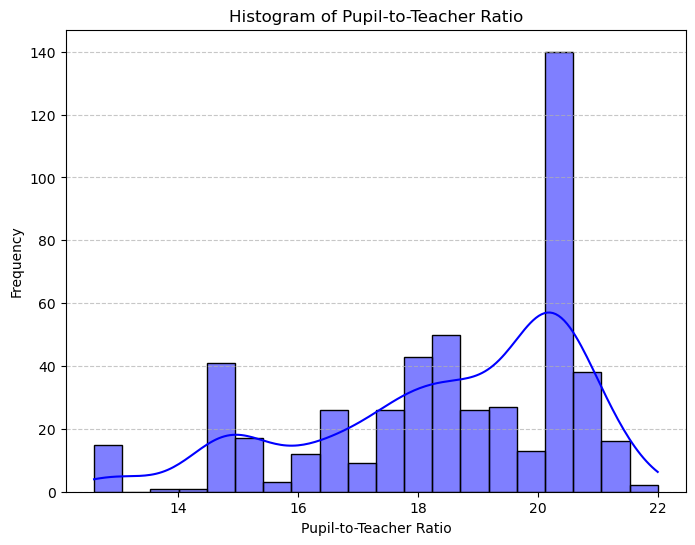

In [12]:
ptratio_column = "PTRATIO"  

plt.figure(figsize=(8, 6))
sns.histplot(boston_df[ptratio_column], bins=20, kde=True, color="blue")

plt.xlabel("Pupil-to-Teacher Ratio")
plt.ylabel("Frequency")
plt.title("Histogram of Pupil-to-Teacher Ratio")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [13]:
from scipy.stats import ttest_ind

charles_column = "CHAS"  
medv_column = "MEDV"  


group1 = boston_df[boston_df[charles_column] == 1][medv_column]  
group2 = boston_df[boston_df[charles_column] == 0][medv_column]  


t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  


print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median home values.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median home values.")


T-statistic: 3.1133, P-value: 0.0036
Reject the null hypothesis: There is a significant difference in median home values.
